In [ ]:
pip install tensorflow

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import files
import tensorflow as tf
from keras.models import Sequential
from keras.layers import GRU, Dense, Activation, Masking
from sklearn import datasets

In [ ]:
# Extrahieren die Datensätze für die Nutzung. Vorher müssen die Daten in den Ordner Content eingefügt werden.
pfad = "/content/Blutprobe0.xlsx"
Blutprobe0 = pd.read_excel(pfad)

pfad = "/content/Blutprobe01.xlsx"
Blutprobe01 = pd.read_excel(pfad)

pfad = "/content/Blutprobe02.xlsx"
Blutprobe02 = pd.read_excel(pfad)

pfad = "/content/Blutprobe05.xlsx"
Blutprobe05 = pd.read_excel(pfad)

pfad = "/content/Blutprobe5.xlsx"
Blutprobe5 = pd.read_excel(pfad)

In [ ]:
#Das sind die Ergebnisse die benötigt werden zu jedem Datensatz.
ergebnisse = {
    'Krankheitszustand': [1, 0, 0, 0, 0]
}

labels = pd.DataFrame(ergebnisse)

In [ ]:
# Organisieren der Daten und Labels. Verknüpfen die Datensätze jeweils mit einem Label.
data_frames = [Blutprobe0, Blutprobe01, Blutprobe02, Blutprobe05, Blutprobe5]
data_with_labels = []

for i, df in enumerate(data_frames):
    label = labels.loc[i, 'Krankheitszustand']  # Das Label für den aktuellen Datensatz
    data_with_labels.append((df, label))

In [ ]:
# Ausgabe der ersten paar Einträge in data_with_labels
for i in range(5):  # Zeige nur die ersten 5 Einträge zur Demonstration
    print("Datensatz {}: Label - {}".format(i+1, data_with_labels[i][1]))
    print(data_with_labels[i][0])
    print()

Datensatz 1: Label - 1
       Frequenz  Amplitude       Phase  Unbekannt  Unbekannt.1  Unbekannt.2  \
0         12.50   0.033805   37.189231   0.159952   -74.135047     0.211345   
1         12.52   0.038209  -79.949534   0.191839  -243.846252     0.199172   
2         12.54   0.042465 -103.084784   0.199872    74.089905     0.212459   
3         12.56   0.040868 -208.119583   0.183590   -60.300880     0.222604   
4         12.58   0.038928 -172.454253   0.175801   -54.756824     0.221434   
...         ...        ...         ...        ...          ...          ...   
12035      0.00   0.000000    0.000000   0.000000     0.000000     0.000000   
12036      0.00   0.000000    0.000000   0.000000     0.000000     0.000000   
12037      0.00   0.000000    0.000000   0.000000     0.000000     0.000000   
12038      0.00   0.000000    0.000000   0.000000     0.000000     0.000000   
12039      0.00   0.000000    0.000000   0.000000     0.000000     0.000000   

       Unbekannt.3  Unbekann

In [ ]:
X_train = np.array([df.values for df, _ in data_with_labels[-4:]])  # Extrahieren der Daten aus den DataFrames
X_train = X_train[:, :, [0, 5, 6]]   # Die ersten drei Spalten werden extrahiert (Frequenz, Amplitude, Phase)
y_train = np.array([label for _, label in data_with_labels[-4:]])  # Extrahieren der Labels
X_test = np.array([Blutprobe0.values])
X_test = X_test[:, :, [0, 5, 6]]
label_entry = labels['Krankheitszustand'].iloc[4]
y_test = np.array(label_entry)

In [ ]:
# Netzwerksparameter
input_size = 3
hidden_size = 256
num_classes = 1
batch_size = 10
num_epochs = 50
learning_rate = 0.0003
threshold = 0.5

In [ ]:
# Modell erstellen
model = Sequential([
    Masking(mask_value=0, input_shape=(12040, input_size)),
    GRU(hidden_size, input_shape=(12040, input_size), return_sequences=True),
    GRU(hidden_size, return_sequences=True),
    GRU(hidden_size, return_sequences=False),
    Dense(hidden_size, input_shape=(hidden_size,), activation='relu'),
    Dense(hidden_size, input_shape=(hidden_size,), activation='relu'),
    Dense(num_classes, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Loss-Funktion, Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,epochs= num_epochs, batch_size= batch_size)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 133s 133s/step - accuracy: 1.0000 - loss: 0.2306
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 133s 133s/step - accuracy: 1.0000 - loss: 0.0909
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 142s 142s/step - accuracy: 1.0000 - loss: 0.0310
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 142s 142s/step - accuracy: 1.0000 - loss: 0.0093
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 123s 123s/step - accuracy: 1.0000 - loss: 0.0030
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 139s 139s/step - accuracy: 1.0000 - loss: 0.0011
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 141s 141s/step - accuracy: 1.0000 - loss: 4.1736e-04
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 144s 144s/step - accuracy: 1.0000 - loss: 1.7773e-04
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 137s 137s/step - accuracy: 1.0000 - loss: 8.3071e-05
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 115s 115s/step - accuracy: 1.0000 - loss: 4.1789e-05
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 143s 143s/step - accuracy: 1.0000 - loss: 2.2455e-05
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 115s 1

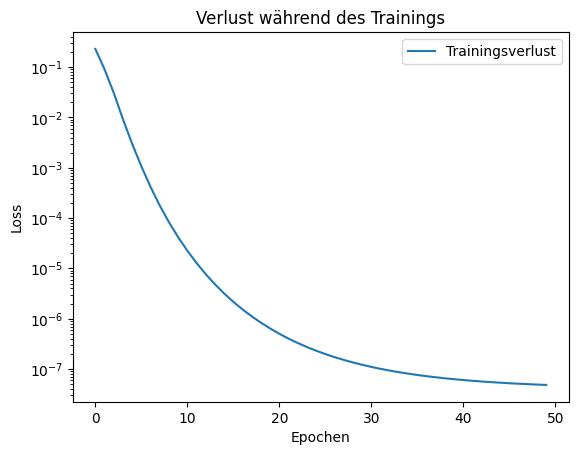

In [ ]:
# Plotten die Veränderung der Loss abhängig von Epoch.
plt.plot(history.history['loss'], label='Trainingsverlust')
plt.yscale('log')
plt.xlabel('Epochen')
plt.ylabel('Loss')
plt.title('Verlust während des Trainings')
plt.legend()
plt.show()

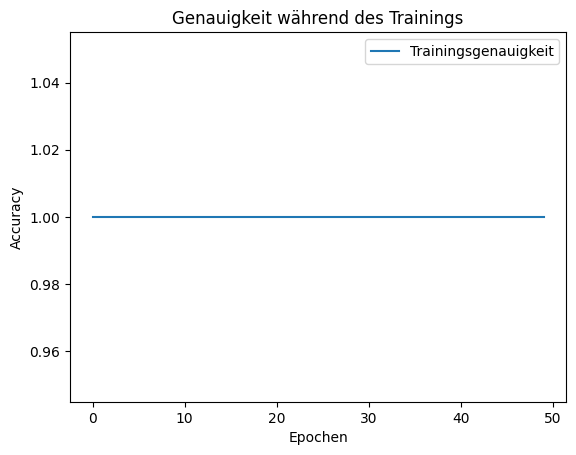

In [ ]:
plt.plot(history.history['accuracy'], label='Trainingsgenauigkeit')
#plt.plot(history.history['val_accuracy'], label='Validierungsgenauigkeit')
plt.xlabel('Epochen')
plt.ylabel('Accuracy')
plt.title('Genauigkeit während des Trainings')
plt.legend()
plt.show()

In [ ]:
result = model.evaluate(X_train, y_train)
loss, accuracy = result  # Hier wird das Tupel aufgelöst
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 1.0000 - loss: 4.7605e-08
Test Loss: 4.760497063216462e-08, Test Accuracy: 1.0


In [ ]:
# Vorhersage machen. Das sind die Outputs für die Vorhersage von X_test.
binäre_vorhersage = (model.predict(X_test) > threshold).astype(int)
class_labels = np.where(binäre_vorhersage == 1, "Blutgerinnung", "Keine Blutgerinnung")
print(class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
[['Keine Blutgerinnung']]




---



In [ ]:
# Berechne die Genauigkeit
accuracy = accuracy_score(y_test, binäre_vorhersage)
print("Genauigkeit auf Testdaten:", accuracy)

Genauigkeit auf Testdaten: 0.495


In [ ]:
# Berechne Precision, Recall und F1-Score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, binäre_vorhersage, average='binary')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Precision: 0.5217391304347826
Recall: 0.5660377358490566
F1-Score: 0.5429864253393665


ValueError: 'c' argument has 1 elements, which is inconsistent with 'x' and 'y' with size 3.

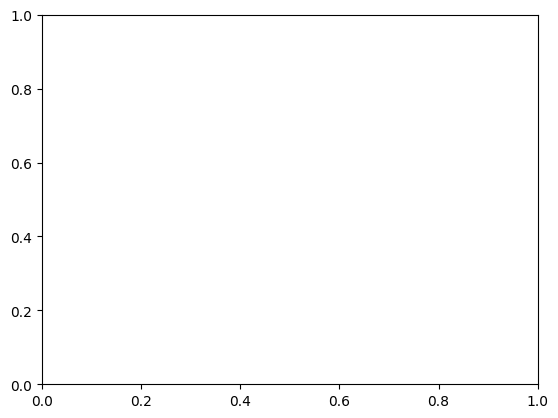

In [ ]:
# Vorhersage Plotten!!!
plt.scatter(X_test[:, 0], X_test[:, 1], c=binäre_vorhersage, cmap='viridis', label=class_labels)
plt.xlabel('Amplitude')
plt.ylabel('Frequenz')
plt.title('Binary Classification')
#plt.legend(["Gesund", "Krank"])
plt.show()



---



---



---



---



---



In [ ]:
#Das sind alle Datensätze um das Neuronale Netzwerk zu trainieren. Wir haben 5 Datensätze die Gesund signifizieren und 6 Datensätze um Krank zu signifizieren. Also
#diesen Daten erzeugen wir alle Datensätze!!!

#Gesund
data1 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0, 0, 0.15, 0.1, 0.2, 0.25, 0.2, 0, 0.1, 0.15, 0.1, 0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.5, 0.3, 0.25, 0.1]
}

#Gesund
data2 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0, 0, 0.165, 0.11, 0.22, 0.275, 0.22, 0, 0.11, 0.165, 0.11, 0, 0.22, 0.33, 0.44, 0.55, 0.66, 0.55, 0.33, 0.279, 0.11]
}

#Gesund
data3 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0, 0, 0.15, 0.1, 0.1, 0.15, 0, 0, 0.1, 0.15, 0.1, 0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.5, 0.3, 0.25, 0.1]
}
#Gesund
data4 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0, 0.1, 0.2, 0.4, 0.2, 0.15, 0, 0, 0.1, 0.15, 0.1, 0, 0.2, 0.3, 0.4, 0.6, 0.7, 0.5, 0.3, 0.25, 0.1]
}

#Gesund
data5 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0, 0.1, 0.2, 0.4, 0.2, 0.15, 0, 0, 0.1, 0.15, 0.1, 0.2, 0.4, 0.6, 0.7, 0.8, 1, 0.8, 0.6, 0.5, 0.5]
}

#Krank
data6 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0.4, 0.5, 0.6, 0.8, 1, 1, 0.8, 0.6, 0.5, 0.2, 0.1, 0.15, 0.1, 0, 0, 0.15, 0.2, 0.4, 0.2, 0.1, 0]
}

#Krank
data7 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0.4, 0.6, 0.5, 0.4, 0.3, 0.1, 0.2, 0.1, 0.1, 0.1, 0.3, 0.1, 0.15, 0.1, 0, 0, 0.15, 0.2, 0.3, 0.2, 0.1, ]
}

#Krank
data8 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0.1, 0.6, 0.6, 0.7, 0.5, 0.4, 0.2, 0.1, 0, 0.2, 0.3, 0.2, 0.3, 0.3, 0.1, 0.1, 0.15, 0.2, 0.3, 0.2, 0.1, ]
}

#Krank
data9 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0.57, 0.48, 0.61, 0.81, 1.02, 0.83, 0.72, 0.62, 0.41, 0.18, 0.1, 0.145, 0.11, 0.01, 0.03, 0.165, 0.23, 0.39, 0.21, 0.12, 0.02]
}

#Krank
data10 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0.54, 0.51, 0.63, 0.79, 1.02, 0.81, 0.71, 0.59, 0.39, 0.19, 0.11, 0.17, 0.09, 0, 0.01, 0.145, 0.21, 0.43, 0.22, 0.08, 0.01]
}

#Krank
data11 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0.51, 0.5, 0.61, 0.79, 0.8, 0.85, 0.85, 0.64, 0.42, 0.22, 0.09, 0.16, 0.09, 0.01, 0.01, 0.14, 0.22, 0.38, 0.3, 0.2, 0.12]
}

In [ ]:
data1 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0, 0, 0.15, 0.1, 0.2, 0.25, 0.2, 0, 0.1, 0.15, 0.1, 0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.5, 0.3, 0.25, 0.1]
}

df_gesund1 = pd.DataFrame(data1)

In [ ]:
data2 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0, 0, 0.165, 0.11, 0.22, 0.275, 0.22, 0, 0.11, 0.165, 0.11, 0, 0.22, 0.33, 0.44, 0.55, 0.66, 0.55, 0.33, 0.279, 0.11]
}
df_gesund2 = pd.DataFrame(data2)

In [ ]:
data3 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0, 0, 0.15, 0.1, 0.1, 0.15, 0, 0, 0.1, 0.15, 0.1, 0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.5, 0.3, 0.25, 0.1]
}

df_gesund3 = pd.DataFrame(data3)

In [ ]:
data4 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0, 0.1, 0.2, 0.4, 0.2, 0.15, 0, 0, 0.1, 0.15, 0.1, 0, 0.2, 0.3, 0.4, 0.6, 0.7, 0.5, 0.3, 0.25, 0.1]
}

df_gesund4 = pd.DataFrame(data4)

In [ ]:
data5 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0, 0.1, 0.2, 0.4, 0.2, 0.15, 0, 0, 0.1, 0.15, 0.1, 0.2, 0.4, 0.6, 0.7, 0.8, 1, 0.8, 0.6, 0.5, 0.5]
}

df_gesund5 = pd.DataFrame(data5)

In [ ]:
data6 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0.4, 0.5, 0.6, 0.8, 1, 1, 0.8, 0.6, 0.5, 0.2, 0.1, 0.15, 0.1, 0, 0, 0.15, 0.2, 0.4, 0.2, 0.1, 0]
}

df_krank1 = pd.DataFrame(data6)

In [ ]:
data7 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0.4, 0.6, 0.5, 0.4, 0.3, 0.1, 0.2, 0.1, 0.1, 0.1, 0.3, 0.1, 0.15, 0.1, 0, 0, 0.15, 0.2, 0.3, 0.2, 0.1, ]
}

df_krank2 = pd.DataFrame(data7)

In [ ]:
data8 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0.1, 0.6, 0.6, 0.7, 0.5, 0.4, 0.2, 0.1, 0, 0.2, 0.3, 0.2, 0.3, 0.3, 0.1, 0.1, 0.15, 0.2, 0.3, 0.2, 0.1, ]
}

df_krank3 = pd.DataFrame(data8)

In [ ]:
data9 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0.57, 0.48, 0.61, 0.81, 1.02, 0.83, 0.72, 0.62, 0.41, 0.18, 0.1, 0.145, 0.11, 0.01, 0.03, 0.165, 0.23, 0.39, 0.21, 0.12, 0.02]
}

df_krank4 = pd.DataFrame(data9)

In [ ]:
data10 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0.54, 0.51, 0.63, 0.79, 1.02, 0.81, 0.71, 0.59, 0.39, 0.19, 0.11, 0.17, 0.09, 0, 0.01, 0.145, 0.21, 0.43, 0.22, 0.08, 0.01]
}

df_krank5 = pd.DataFrame(data10)

In [ ]:
data11 = {
    'Frequenz': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200],
    'Amplitude': [0.51, 0.5, 0.61, 0.79, 0.8, 0.85, 0.85, 0.64, 0.42, 0.22, 0.09, 0.16, 0.09, 0.01, 0.01, 0.14, 0.22, 0.38, 0.3, 0.2, 0.12]
}

df_krank6 = pd.DataFrame(data11)

In [ ]:
# Liniendiagramm erstellen data1
plt.figure(figsize=(30, 15))
plt.plot(df_gesund1['Frequenz'], df_gesund1['Amplitude'], marker='o', linestyle='-')

plt.title('Spektroskopie')
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')

plt.xticks([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200], rotation= 45)
plt.show;

In [ ]:
# Liniendiagramm erstellen data2
plt.figure(figsize=(30, 15))
plt.plot(df_gesund2['Frequenz'], df_gesund2['Amplitude'], marker='o', linestyle='-')

plt.title('Spektroskopie')
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')

plt.xticks([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200], rotation= 45)
plt.show;

In [ ]:
# Liniendiagramm erstellen data3
plt.figure(figsize=(30, 15))
plt.plot(df_gesund3['Frequenz'], df_gesund3['Amplitude'], marker='o', linestyle='-')

plt.title('Spektroskopie')
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')

plt.xticks([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200], rotation= 45)
plt.show;

In [ ]:
# Liniendiagramm erstellen data4
plt.figure(figsize=(30, 15))
plt.plot(df_gesund4['Frequenz'], df_gesund4['Amplitude'], marker='o', linestyle='-')

plt.title('Spektroskopie')
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')

plt.xticks([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200], rotation= 45)
plt.show;

In [ ]:
# Liniendiagramm erstellen data5
plt.figure(figsize=(30, 15))
plt.plot(df_gesund5['Frequenz'], df_gesund5['Amplitude'], marker='o', linestyle='-')

plt.title('Spektroskopie')
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')

plt.xticks([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200], rotation= 45)
plt.show;

In [ ]:
# Liniendiagramm erstellen data6
plt.figure(figsize=(30, 15))
plt.plot(df_krank1['Frequenz'], df_krank1['Amplitude'], marker='o', linestyle='-')

plt.title('Spektroskopie')
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')

plt.xticks([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200], rotation= 45)
plt.show;

In [ ]:
# Liniendiagramm erstellen data7
plt.figure(figsize=(30, 15))
plt.plot(df_krank2['Frequenz'], df_krank2['Amplitude'], marker='o', linestyle='-')

plt.title('Spektroskopie')
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')

plt.xticks([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200], rotation= 45)
plt.show;

In [ ]:
# Liniendiagramm erstellen data8
plt.figure(figsize=(30, 15))
plt.plot(df_krank3['Frequenz'], df_krank3['Amplitude'], marker='o', linestyle='-')

plt.title('Spektroskopie')
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')

plt.xticks([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200], rotation= 45)
plt.show;

In [ ]:
# Liniendiagramm erstellen data9
plt.figure(figsize=(30, 15))
plt.plot(df_krank4['Frequenz'], df_krank4['Amplitude'], marker='o', linestyle='-')

plt.title('Spektroskopie')
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')

plt.xticks([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200], rotation= 45)
plt.show;

In [ ]:
# Liniendiagramm erstellen data10
plt.figure(figsize=(30, 15))
plt.plot(df_krank5['Frequenz'], df_krank5['Amplitude'], marker='o', linestyle='-')

plt.title('Spektroskopie')
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')

plt.xticks([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200], rotation= 45)
plt.show;

In [ ]:
# Liniendiagramm erstellen data11
plt.figure(figsize=(30, 15))
plt.plot(df_krank6['Frequenz'], df_krank6['Amplitude'], marker='o', linestyle='-')

plt.title('Spektroskopie')
plt.xlabel('Frequenz')
plt.ylabel('Amplitude')

plt.xticks([100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200], rotation= 45)
plt.show;

In [ ]:
#Das sind die Ergebnisse die benötigt werden zu jedem Datensatz.
ergebnisse = {
    'Krankheitszustand': [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
}

df_krankheitszustand = pd.DataFrame(ergebnisse)